<a href="https://colab.research.google.com/github/aayush552/Movie-Recommender-in-python/blob/master/Aayush_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/u.data',names=column_names)

In [7]:
df.head()


,user_id,item_id,rating,timestamp
0,0\t50\t5\t881250949,NaN,NaN,NaN
1,0\t172\t5\t881250949,NaN,NaN,NaN
2,0\t133\t1\t881250949,NaN,NaN,NaN
3,196\t242\t3\t881250949,NaN,NaN,NaN
4,186\t302\t3\t891717742,NaN,NaN,NaN


In [8]:
movie_titles = pd.read_csv("/content/drive/MyDrive/Movie_Id_Titles (1)")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,rating,timestamp,title_x,title_y,item_id,title


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()


Series([], Name: rating, dtype: float64)

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()


Series([], Name: rating, dtype: int64)

In [18]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,


In [19]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,


In [27]:
plt.figure(figsize=(10,4))
ratings ['ratings'].hist(bins=70)


KeyError: ignored

<Figure size 720x288 with 0 Axes>

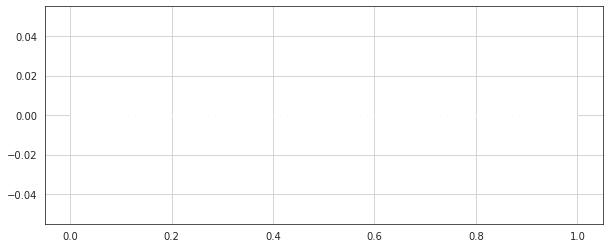

In [23]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

ValueError: ignored

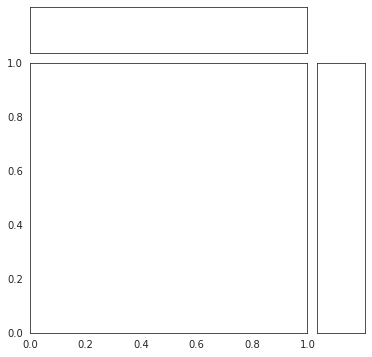

In [28]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)


In [29]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title
user_id


In [30]:
ratings.sort_values('num of ratings',ascending=False).head(10)

KeyError: ignored

In [31]:
ratings.head()

,rating
title,


In [32]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

KeyError: ignored

In [33]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

NameError: ignored

In [34]:
orr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

NameError: ignored

In [35]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

NameError: ignored

In [36]:
orr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

NameError: ignored

In [37]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

NameError: ignored

In [38]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

NameError: ignored